## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:

# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [65]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [67]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [68]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [70]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [71]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 30



>**MLP + BN + Dropout + AdamOptimizer + ReLu activation**

> **Architecture 1**: 784-366-100-10;   
> droput: .5,.5 

std = sqrt(2/fan-in) as it is relu




In [74]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout


model = Sequential()

model.add(Dense(366, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.07392, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.14142, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(output_dim, activation='softmax'))


model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 366)               287310    
_________________________________________________________________
batch_normalization_31 (Batc (None, 366)               1464      
_________________________________________________________________
dropout_31 (Dropout)         (None, 366)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 100)               36700     
_________________________________________________________________
batch_normalization_32 (Batc (None, 100)               400       
_________________________________________________________________
dropout_32 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)              

Test score: 0.05789125898362254
Test accuracy: 0.9844


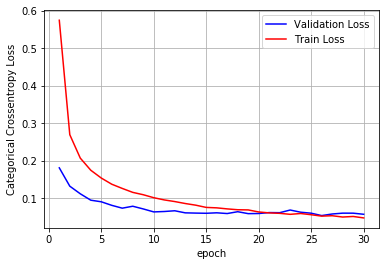

In [75]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

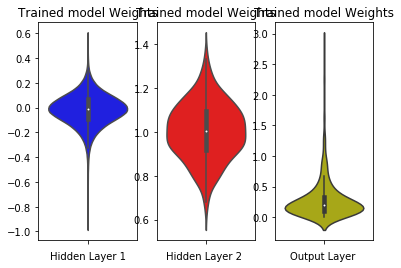

In [76]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()



>**MLP + BN + Dropout + AdamOptimizer + ReLu activation**

> **Architecture 2**: 784-456-128-10;   
> droput: .5,.5 

std = sqrt(2/fan-in) as it is ReLu




In [77]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

model2 = Sequential()

model2.add(Dense(456, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0662, seed=None)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))


model2.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model2.add(BatchNormalization())
model2.add(Dropout(0.5))


model2.add(Dense(output_dim, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 165us/step - loss: 0.5033 - acc: 0.8461 - val_loss: 0.1629 - val_acc: 0.9510
Epoch 2/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.2371 - acc: 0.9293 - val_loss: 0.1171 - val_acc: 0.9648
Epoch 3/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.1830 - acc: 0.9448 - val_loss: 0.0951 - val_acc: 0.9704
Epoch 4/30
60000/60000 [==============================] - 6s 97us/step - loss: 0.1527 - acc: 0.9544 - val_loss: 0.0912 - val_acc: 0.9707
Epoch 5/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.1358 - acc: 0.9595 - val_loss: 0.0830 - val_acc: 0.9747
Epoch 6/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.1195 - acc: 0.9641 - val_loss: 0.0758 - val_acc: 0.9767
Epoch 7/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.1078 - acc: 0.9671 - val_loss: 0.0742 - val_a

Test score: 0.056721248715037656
Test accuracy: 0.984


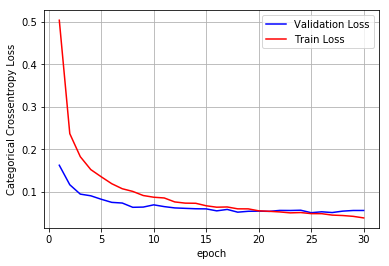

In [78]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

score2 = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score2[0]) 
print('Test accuracy:', score2[1])

fig2,ax2 = plt.subplots(1,1)
ax2.set_xlabel('epoch') ; ax2.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x2 = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy2 = history2.history['val_loss']
ty2 = history2.history['loss']
plt_dynamic(x2, vy2, ty2, ax2)

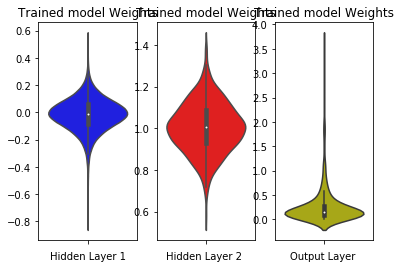

In [79]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

w_after2 = model2.get_weights()

h1_w = w_after2[0].flatten().reshape(-1,1)
h2_w = w_after2[2].flatten().reshape(-1,1)
out_w = w_after2[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()



>**MLP + BN + Dropout + AdamOptimizer + ReLu activation**

> **Architecture 3**: 784-256-128-10;   
> droput: .5,.5 

std = sqrt(2/fan-in) as it is ReLu




In [80]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

model3 = Sequential()

model3.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.08838, seed=None)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))


model3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model3.add(BatchNormalization())
model3.add(Dropout(0.5))


model3.add(Dense(output_dim, activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 166us/step - loss: 0.6093 - acc: 0.8126 - val_loss: 0.1969 - val_acc: 0.9397
Epoch 2/30
60000/60000 [==============================] - 5s 89us/step - loss: 0.2919 - acc: 0.9111 - val_loss: 0.1356 - val_acc: 0.9576
Epoch 3/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.2280 - acc: 0.9318 - val_loss: 0.1173 - val_acc: 0.9622
Epoch 4/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.1943 - acc: 0.9419 - val_loss: 0.1041 - val_acc: 0.9664
Epoch 5/30
60000/60000 [==============================] - 5s 89us/step - loss: 0.1661 - acc: 0.9494 - val_loss: 0.0948 - val_acc: 0.9715
Epoch 6/30
60000/60000 [==============================] - 5s 89us/step - loss: 0.1532 - acc: 0.9544 - val_loss: 0.0864 - val_acc: 0.9729
Epoch 7/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.1386 - acc: 0.9584 - val_loss: 0.0800 - val_a

Test score: 0.05895621230599354
Test accuracy: 0.9823


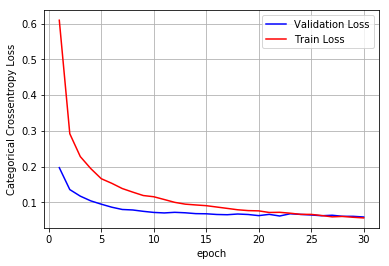

In [81]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

score3 = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score3[0]) 
print('Test accuracy:', score3[1])

fig3,ax3 = plt.subplots(1,1)
ax3.set_xlabel('epoch') ; ax3.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x3 = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy3 = history3.history['val_loss']
ty3 = history3.history['loss']
plt_dynamic(x3, vy3, ty3, ax3)



>**MLP + BN + Dropout + AdamOptimizer + ReLu activation**

> **Architecture 4**: 784-256-96-10;   
> droput: .5,.5 

std = sqrt(2/fan-in) as it is ReLu




In [82]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

model4 = Sequential()

model4.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.08838, seed=None)))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))


model4.add(Dense(96, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.14433, seed=None)) )
model4.add(BatchNormalization())
model4.add(Dropout(0.5))


model4.add(Dense(output_dim, activation='softmax'))
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history4 = model4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 168us/step - loss: 0.6637 - acc: 0.7956 - val_loss: 0.2063 - val_acc: 0.9372
Epoch 2/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.3106 - acc: 0.9086 - val_loss: 0.1522 - val_acc: 0.9539
Epoch 3/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.2386 - acc: 0.9287 - val_loss: 0.1238 - val_acc: 0.9611
Epoch 4/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.2054 - acc: 0.9400 - val_loss: 0.1036 - val_acc: 0.9677
Epoch 5/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.1773 - acc: 0.9465 - val_loss: 0.0939 - val_acc: 0.9713
Epoch 6/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.1587 - acc: 0.9527 - val_loss: 0.0886 - val_acc: 0.9731
Epoch 7/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.1454 - acc: 0.9564 - val_loss: 0.0880 - val_a

Test score: 0.06231452802268032
Test accuracy: 0.9832


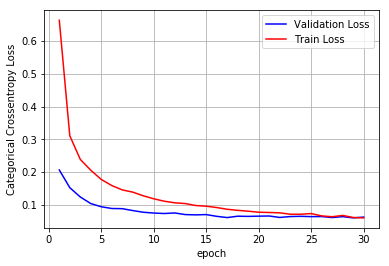

In [83]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

score4 = model4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score4[0]) 
print('Test accuracy:', score4[1])

fig4,ax4 = plt.subplots(1,1)
ax4.set_xlabel('epoch') ; ax4.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x4 = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy4 = history4.history['val_loss']
ty4 = history4.history['loss']
plt_dynamic(x4, vy4, ty4, ax4)



>**MLP + BN + Dropout + AdamOptimizer + ReLu activation**

>**Part 2 : Here we use 3 Hidden Layers**

> **Architecture 5**: 784-512-392-128-10;   
> droput: .5,.5 

std = sqrt(2/fan-in) as it is ReLu




In [84]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

model5 = Sequential()

model5.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))


model5.add(Dense(392, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.07142, seed=None)) )
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model5.add(BatchNormalization())
model5.add(Dropout(0.5))


model5.add(Dense(output_dim, activation='softmax'))
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model5.summary()


history5 = model5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_39 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_39 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 392)               201096    
_________________________________________________________________
batch_normalization_40 (Batc (None, 392)               1568      
_________________________________________________________________
dropout_40 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)             

Test score: 0.057912785604948294
Test accuracy: 0.9846


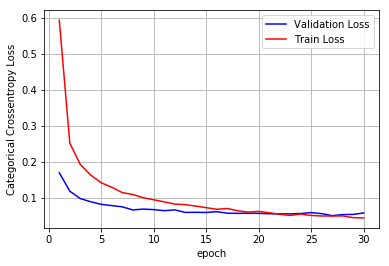

In [85]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

score5 = model5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score5[0]) 
print('Test accuracy:', score5[1])

fig5,ax5 = plt.subplots(1,1)
ax5.set_xlabel('epoch') ; ax5.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x5 = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy5 = history5.history['val_loss']
ty5 = history5.history['loss']
plt_dynamic(x5, vy5, ty5, ax5)

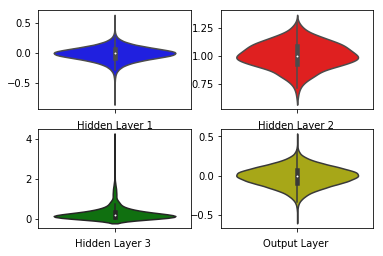

In [86]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

w_after5 = model5.get_weights()

h1_w = w_after5[0].flatten().reshape(-1,1)
h2_w = w_after5[2].flatten().reshape(-1,1)
h3_w = w_after5[4].flatten().reshape(-1,1)
out_w = w_after5[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()



>**MLP + BN + Dropout + AdamOptimizer + ReLu activation**

>**Part 2 : Here we use 3 Hidden Layers**

> **Architecture 6**: 784-600-300-100-10;   
> droput: .5,.5 

std = sqrt(2/fan-in) as it is ReLu




In [87]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

model6 = Sequential()

model6.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0577, seed=None)))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))


model6.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.08164, seed=None)) )
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.14142, seed=None)) )
model6.add(BatchNormalization())
model6.add(Dropout(0.5))


model6.add(Dense(output_dim, activation='softmax'))
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model6.summary()


history6 = model6.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_42 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_42 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 300)               180300    
_________________________________________________________________
batch_normalization_43 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_43 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 100)             

Test score: 0.05445547826328548
Test accuracy: 0.9857


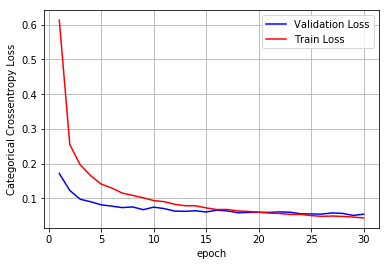

In [88]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

score6 = model6.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score6[0]) 
print('Test accuracy:', score6[1])

fig6,ax6 = plt.subplots(1,1)
ax6.set_xlabel('epoch') ; ax6.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x6 = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy6 = history6.history['val_loss']
ty6 = history6.history['loss']
plt_dynamic(x6, vy6, ty6, ax6)



>**MLP + BN + Dropout + AdamOptimizer + ReLu activation**

>**Part 2 : Here we use 3 Hidden Layers**

> **Architecture 7**: 784-512-456-128-10;   
> droput: .5,.5 

std = sqrt(2/fan-in) as it is ReLu




In [89]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

model7 = Sequential()

model7.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))


model7.add(Dense(456, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0662, seed=None)) )
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model7.add(BatchNormalization())
model7.add(Dropout(0.5))


model7.add(Dense(output_dim, activation='softmax'))
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model7.summary()


history7 = model7.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_45 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_45 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 456)               233928    
_________________________________________________________________
batch_normalization_46 (Batc (None, 456)               1824      
_________________________________________________________________
dropout_46 (Dropout)         (None, 456)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)             

Test score: 0.05791448878053052
Test accuracy: 0.9839


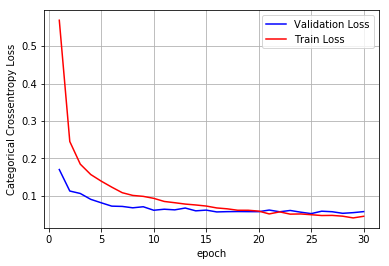

In [90]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

score7 = model7.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score7[0]) 
print('Test accuracy:', score7[1])

fig7,ax7 = plt.subplots(1,1)
ax7.set_xlabel('epoch') ; ax7.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x7 = list(range(1,nb_epoch+1))

vy7 = history7.history['val_loss']
ty7 = history7.history['loss']
plt_dynamic(x7, vy7, ty7, ax7)



>**MLP + BN + Dropout + AdamOptimizer + ReLu activation**

>**Part 2 : Here we use 3 Hidden Layers**

> **Architecture 8**: 784-456-128-32-10;   
> droput: .5,.5 

std = sqrt(2/fan-in) as it is ReLu




In [91]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

model8 = Sequential()

model8.add(Dense(456, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0662, seed=None)))
model8.add(BatchNormalization())
model8.add(Dropout(0.5))


model8.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model8.add(BatchNormalization())
model8.add(Dropout(0.5))

model8.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model8.add(BatchNormalization())
model8.add(Dropout(0.5))


model8.add(Dense(output_dim, activation='softmax'))
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model8.summary()


history8 = model8.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 456)               357960    
_________________________________________________________________
batch_normalization_48 (Batc (None, 456)               1824      
_________________________________________________________________
dropout_48 (Dropout)         (None, 456)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 128)               58496     
_________________________________________________________________
batch_normalization_49 (Batc (None, 128)               512       
_________________________________________________________________
dropout_49 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 32)              

Test score: 0.06451866653093893
Test accuracy: 0.9845


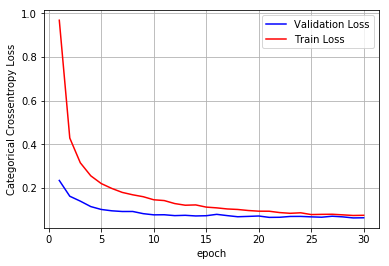

In [92]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

score8 = model8.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score8[0]) 
print('Test accuracy:', score8[1])

fig8,ax8 = plt.subplots(1,1)
ax8.set_xlabel('epoch') ; ax8.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x8 = list(range(1,nb_epoch+1))

vy8 = history8.history['val_loss']
ty8 = history8.history['loss']
plt_dynamic(x8, vy8, ty8, ax8)



>**MLP + BN + Dropout + AdamOptimizer + ReLu activation**

>**Part 3 : Here we use 5 Hidden Layers**

> **Architecture 9**: 784-600-500-400-200-128-10;   
> droput: .5,.5 

std = sqrt(2/fan-in) as it is ReLu




In [93]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

model9 = Sequential()

model9.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0577, seed=None)))
model9.add(BatchNormalization())
model9.add(Dropout(0.5))


model9.add(Dense(500, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.06324, seed=None)) )
model9.add(BatchNormalization())
model9.add(Dropout(0.5))

model9.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0707, seed=None)) )
model9.add(BatchNormalization())
model9.add(Dropout(0.5))

model9.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.08164, seed=None)) )
model9.add(BatchNormalization())
model9.add(Dropout(0.5))

model9.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )
model9.add(BatchNormalization())
model9.add(Dropout(0.5))

model9.add(Dense(output_dim, activation='softmax'))
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model9.summary()


history9 = model9.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_51 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_51 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_52 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_52 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 400)             

Test score: 0.05667422412817832
Test accuracy: 0.9854


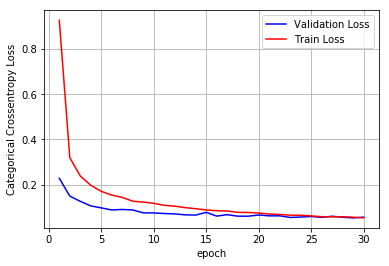

In [94]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

score9 = model9.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score9[0]) 
print('Test accuracy:', score9[1])

fig9,ax9 = plt.subplots(1,1)
ax9.set_xlabel('epoch') ; ax9.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x9 = list(range(1,nb_epoch+1))

vy9 = history9.history['val_loss']
ty9 = history9.history['loss']
plt_dynamic(x9, vy9, ty9, ax9)

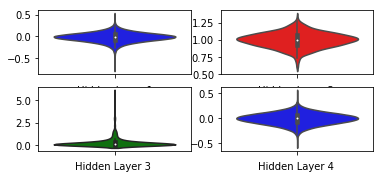

Text(0.5, 0, 'Output Layer')

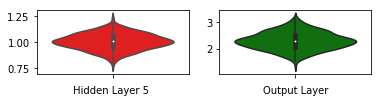

In [95]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

w_after9 = model9.get_weights()

h1_w = w_after9[0].flatten().reshape(-1,1)
h2_w = w_after9[2].flatten().reshape(-1,1)
h3_w = w_after9[4].flatten().reshape(-1,1)
h4_w = w_after9[6].flatten().reshape(-1,1)
h5_w = w_after9[8].flatten().reshape(-1,1)
out_w = w_after9[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(3, 2, 1)
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(3, 2, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(3, 2, 3)
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(3, 2, 4)
ax = sns.violinplot(y=h4_w,color='b')
plt.xlabel('Hidden Layer 4 ')
plt.show()

plt.subplot(3, 2, 5)
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(3, 2, 6)
ax = sns.violinplot(y=out_w, color='g')
plt.xlabel('Output Layer')



>**MLP + BN + Dropout + AdamOptimizer + ReLu activation**

>**Part 3 : Here we use 5 Hidden Layers**

> **Architecture 10**: 784-512-456-392-256-128-10;   
> droput: .5,.5 

std = sqrt(2/fan-in) as it is ReLu




In [96]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

model10 = Sequential()

model10.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model10.add(BatchNormalization())
model10.add(Dropout(0.5))


model10.add(Dense(456, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.06622, seed=None)) )
model10.add(BatchNormalization())
model10.add(Dropout(0.5))

model10.add(Dense(392, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.07142, seed=None)) )
model10.add(BatchNormalization())
model10.add(Dropout(0.5))

model10.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.08838, seed=None)) )
model10.add(BatchNormalization())
model10.add(Dropout(0.5))

model10.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model10.add(BatchNormalization())
model10.add(Dropout(0.5))

model10.add(Dense(output_dim, activation='softmax'))
model10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model10.summary()


history10 = model10.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_56 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_56 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 456)               233928    
_________________________________________________________________
batch_normalization_57 (Batc (None, 456)               1824      
_________________________________________________________________
dropout_57 (Dropout)         (None, 456)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 392)             

Test score: 0.06008605453777127
Test accuracy: 0.9857


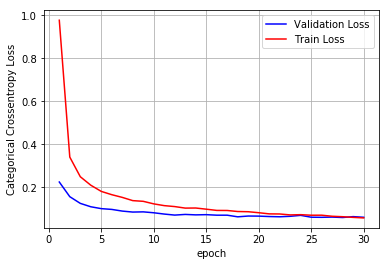

In [97]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

score10 = model10.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score10[0]) 
print('Test accuracy:', score10[1])

fig10,ax10 = plt.subplots(1,1)
ax10.set_xlabel('epoch') ; ax10.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x10 = list(range(1,nb_epoch+1))

vy10 = history10.history['val_loss']
ty10 = history10.history['loss']
plt_dynamic(x10, vy10, ty10, ax10)




S.No | Architecture          | Score         | Test Accuracy|
-----| ----------------------|---------------| ------------ |
1.   |    784-366-100-10     |0.0578912589   |0.9844        | 
2.   | 784-456-128-10        |0.0567212487   |0.984         |2 Hidden Layers
3.   | 784-256-128-10        |0.058956212    |0.9823        |
4.   |784-256-96-10          |0.062314528    |0.9832        |
-----|-----------------------|---------------|--------------|
5.   |    784-366-100-10     |0.057912785    |0.9846        | 
6.   | 784-600-300-100-10    |0.054455478    |0.9857        |3 Hidden Layers
7.   | 784-512-456-128-10    |0.057914488    |0.9839        |
8.   |784-456-128-32-10      |0.06451866     |0.9845        |
-----|-----------------------|---------------|--------------|
9.   |-600-500-400-200-128-  |0.05667422     |0.9854        |
10.  |-512-456-392-256-128-  |0.06008605     |0.9857        |5 Hidden Layers





Model 1 ,2 ,3, 4 --> 2 Hidden Layers
------------------------------------
Model 5 ,6 ,7, 8 --> 3 Hidden Layers
------------------------------------
Model 9, 10      --> 5 Hidden Layers
--------------------------------------
'''

So in general we do notice as numbers of layer increase Test Accuracy do increase however MNIST dataset is so simple and increase is so nomimal we should not be commenting on the basis of this.
Also we see the dataset where first layer has lesser number of neurons compared to other architecture tend to perform worser. Example whenever our first hidden layer is low like 256 or 366 (check model 3,4 and 5) accuracy is lower. 
Again as i mentioned this dataset is so simple and gain in accuracy is so nominal we should not be "concluding" right away but in general these two points we do notice.